In [43]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [44]:
df = pd.read_csv('employee.csv')
df.head(5)

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday
0,Paolina Amorine,Female,78413 Lakeland Alley,Canada,Royal Military College of Canada,Account Executive,Devpulse,$99147.62,visa-electron,$106898.63,Volvo,01/01/2000
1,Kimbra Curston,Female,4449 Amoth Street,Russia,Tomsk State University of Architecture and Bui...,Programmer Analyst IV,Meejo,$20090.01,bankcard,$103210.76,Toyota,25/08/1991
2,Terrance Vuitton,Male,0 Dawn Parkway,United States,University of North Carolina at Greensboro,Geologist II,Tagfeed,$22821.37,solo,$102610.26,NaN,09/02/1993
3,Dex Bradforth,Male,76082 Cherokee Point,Poland,Warsaw School of Information Technology,Senior Cost Accountant,Blogpad,$55572.79,instapayment,$348744.48,Oldsmobile,18/01/2005
4,Eydie Spoure,Female,6568 Glacier Hill Place,Poland,Pedagogical University of Bydgoszcz,Senior Developer,Linktype,$46588.59,mastercard,$306061.37,Buick,09/12/1993


In [45]:
df.isnull().sum()

full_name       0
gender          0
address         0
country         0
university      0
job_title       0
company         0
salary         45
credit_card     0
balance        58
vehicle        32
birthday        0
dtype: int64

# **Data Cleaning**

****We can see that our dataset has some null values. I will print only those columns that have null values. Then we start our cleaning operations.****

In [46]:
df.columns[df.isnull().any()]

Index(['salary', 'balance', 'vehicle'], dtype='object')

In [47]:
cols = df.columns[df.isnull().any()]
df[cols].isnull().sum()

salary     45
balance    58
vehicle    32
dtype: int64

In [48]:
# percentage of null values 

for col in df.columns:
    missing_percent = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_percent*100)))

full_name - 0%
gender - 0%
address - 0%
country - 0%
university - 0%
job_title - 0%
company - 0%
salary - 4%
credit_card - 0%
balance - 6%
vehicle - 3%
birthday - 0%


Here we visualize this null values of our dataset using seaborn. we can clearly see that we have null values in salary, balance and vehicle column. 

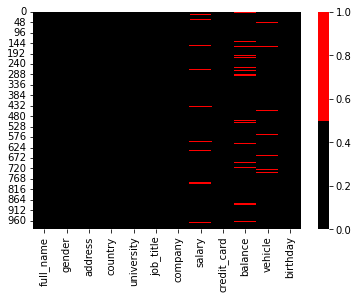

In [49]:
# 
cols = df.columns
colors = ['black', 'red']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

**We can't fill our values using median,mean or any other method. because there are '$' sign.**
**We have to get rid of it.**

In [50]:
df['salary'] = df['salary'].replace(r'\$', r'', regex=True)

In [51]:
df['balance'] = df['balance'].replace(r'\$', r'', regex=True)

In [52]:
# Now check again and '$' sign is vanish. 
df.head(1)

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday
0,Paolina Amorine,Female,78413 Lakeland Alley,Canada,Royal Military College of Canada,Account Executive,Devpulse,99147.62,visa-electron,106898.63,Volvo,01/01/2000


Now here is the thing. we remove '$' sign so that we can fill our nan values. but if we check our datatype we can see that our integer columns represent an object. There is no numeric columns. so we have to make it numeric. then we convert it to an integer. 

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    1000 non-null   object
 1   gender       1000 non-null   object
 2   address      1000 non-null   object
 3   country      1000 non-null   object
 4   university   1000 non-null   object
 5   job_title    1000 non-null   object
 6   company      1000 non-null   object
 7   salary       955 non-null    object
 8   credit_card  1000 non-null   object
 9   balance      942 non-null    object
 10  vehicle      968 non-null    object
 11  birthday     1000 non-null   object
dtypes: object(12)
memory usage: 93.9+ KB


In [54]:
# Make it numeric.

df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

In [55]:
# make it integer. but still we have nan values and cannot convert float to integer.
# I'm using median value fill our nan values

median_salary = df['salary'].median()
print(median_salary)

median_balance = df['balance'].median()
print(median_balance)

60931.67
265862.935


In [59]:
df['salary'] = df['salary'].fillna(median_salary)
df['balance'] = df['balance'].fillna(median_balance)

# I checked again and there are no more null values ​​in these two columns. Now make it integer.

dtype('float64')

In [62]:
df['salary'] = df['salary'].apply(np.int64)
df['balance'] = df['balance'].apply(np.int64)
df.info()

# You can clearly see that we have converted these columns to an integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    1000 non-null   object
 1   gender       1000 non-null   object
 2   address      1000 non-null   object
 3   country      1000 non-null   object
 4   university   1000 non-null   object
 5   job_title    1000 non-null   object
 6   company      1000 non-null   object
 7   salary       1000 non-null   int64 
 8   credit_card  1000 non-null   object
 9   balance      1000 non-null   int64 
 10  vehicle      1000 non-null   object
 11  birthday     1000 non-null   object
dtypes: int64(2), object(10)
memory usage: 93.9+ KB


However there is another object column which has null value. We want to track our null values ​​for this column. So I replaced all null values ​​with 'None'.


In [57]:
# 
df['vehicle'] = df['vehicle'].fillna('None')

In [58]:
# after all this operation we've  completed our cleaning part.